In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

### Descarga

In [2]:
V = np.array([9, 8, 7,6,5, 4, 3,2, 1, 0.8, 0.6, 0.4,0.2, 0])
V_err = 0.1

frames = np.array([158, 234, 323, 424, 552, 704, 904, 1176, 1644, 1824, 2008, 2264,2732, 51108])

In [3]:
V = V[0:-1]
frames = frames[0:-1]

fps = 30
delta_t =  1/fps

t = delta_t*(frames - frames[0])
t_err = delta_t

delta_t


0.03333333333333333

In [4]:
print(V)
print(t)

[9.  8.  7.  6.  5.  4.  3.  2.  1.  0.8 0.6 0.4 0.2]
[ 0.          2.53333333  5.5         8.86666667 13.13333333 18.2
 24.86666667 33.93333333 49.53333333 55.53333333 61.66666667 70.2
 85.8       ]


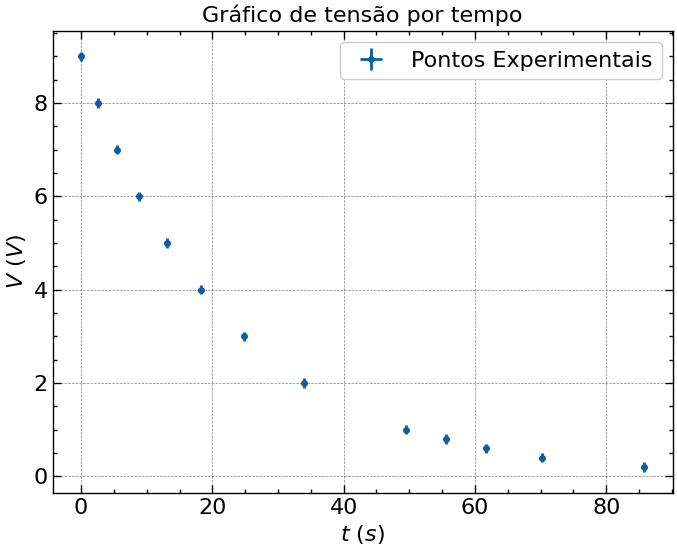

In [5]:
plt.errorbar(t,V, xerr= t_err, yerr= V_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')

plt.xlabel("$t \ (s)$")
plt.ylabel("$V \ (V)$")
plt.title("Gráfico de tensão por tempo")

plt.legend()

In [6]:
def func(t, V_0, tau): 
    return V_0 * np.exp(-t/tau)

popt, pcov = curve_fit(func, t, V)
V_0, tau = popt
V_0_err, tau_err = np.sqrt(np.diag(pcov))
r2 = r2_score(V, func(t, *popt))
print('V_0 = ', V_0)
print('tau = ', tau)
print(r'r^2 =', r2)
print('V_0_err = ', V_0_err)
print('tau_err = ', tau_err)


V_0 =  8.955196266275697
tau =  22.59003057578793
r^2 = 0.9999426463306412
V_0_err =  0.016620961917505363
tau_err =  0.09083556492892207


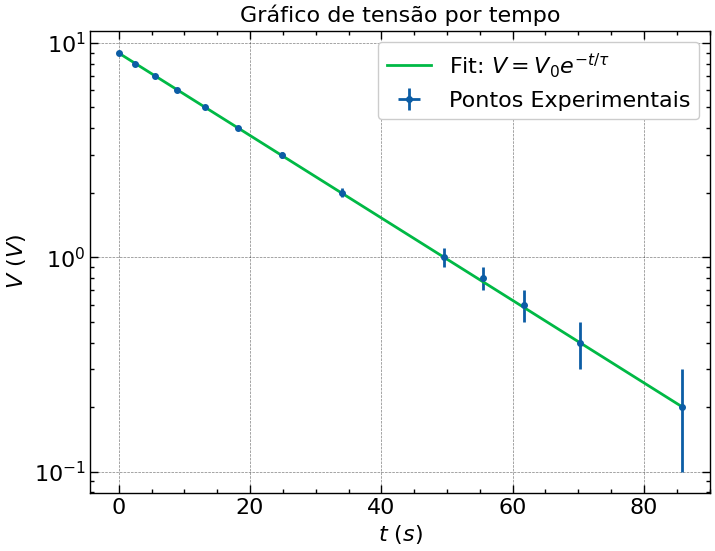

In [7]:
plt.errorbar(t,V, xerr= t_err, yerr= V_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(t, func(t,V_0,tau) , label= r'Fit: $V = V_0 e^{-t/\tau}$') #$r^2$ = %.5f' % (r2)

plt.yscale("log")

plt.xlabel("$t \ (s)$")
plt.ylabel("$V \ (V)$")
plt.title("Gráfico de tensão por tempo")

plt.legend()

In [8]:
R = 0.200*1e6
R_err = 0.001 * 1e6
C = tau/R

C_err = np.sqrt(((1/R) * tau_err)**2 + (tau/(R**2) * R_err)**2)

print(f"C  = {C*1e6} +- {C_err*1e6}") 

C  = 112.95015287893966 +- 0.7247212721338505


### Carga

In [9]:
V = np.array([0,1, 2, 3, 4,5,6,7,8, 8.2,8.4,8.6,8.8])
V_err = 0.1

frames = np.array([571, 606, 636,669, 710, 764, 839,944,1123, 1183,1272,1381,1656])

In [10]:
fps = 30
delta_t =  1/fps

t = delta_t*(frames - frames[0])
t_err = delta_t

delta_t

0.03333333333333333

In [11]:
print(V)
print(t)

[0.  1.  2.  3.  4.  5.  6.  7.  8.  8.2 8.4 8.6 8.8]
[ 0.          1.16666667  2.16666667  3.26666667  4.63333333  6.43333333
  8.93333333 12.43333333 18.4        20.4        23.36666667 27.
 36.16666667]


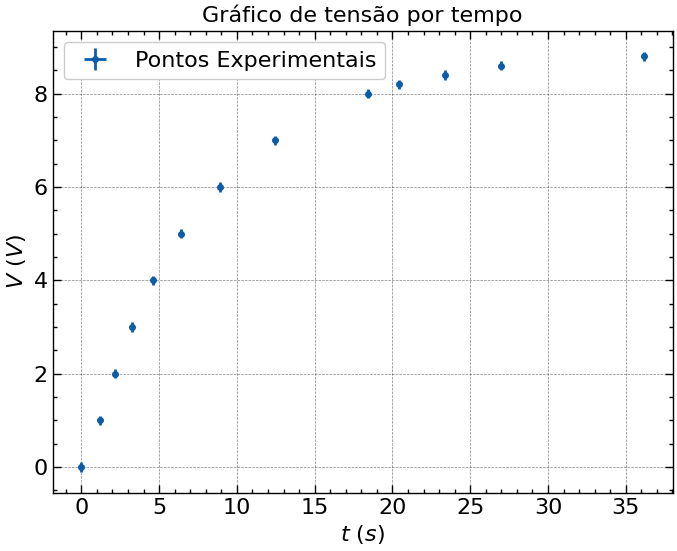

In [12]:
plt.errorbar(t,V, xerr= t_err, yerr= V_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')

plt.xlabel("$t \ (s)$")
plt.ylabel("$V \ (V)$")
plt.title("Gráfico de tensão por tempo")

plt.legend()

In [13]:
def func(t, V_0, tau):
    return V_0 * (1- np.exp(-t/tau))

popt, pcov = curve_fit(func, t, V)
V_0, tau = popt
V_0_err, tau_err = np.sqrt(np.diag(pcov))
r2 = r2_score(V, func(t, *popt))
print('V_0 = ', V_0)
print('tau = ', tau)
print(r'r^2 =', r2)
print('V_0_err = ', V_0_err)
print('tau_err = ', tau_err)

V_0 =  8.893484082451257
tau =  7.978938289198691
r^2 = 0.9993878095769501
V_0_err =  0.05275882891963089
tau_err =  0.13727759373548798


In [14]:
y_data = V_0 - V

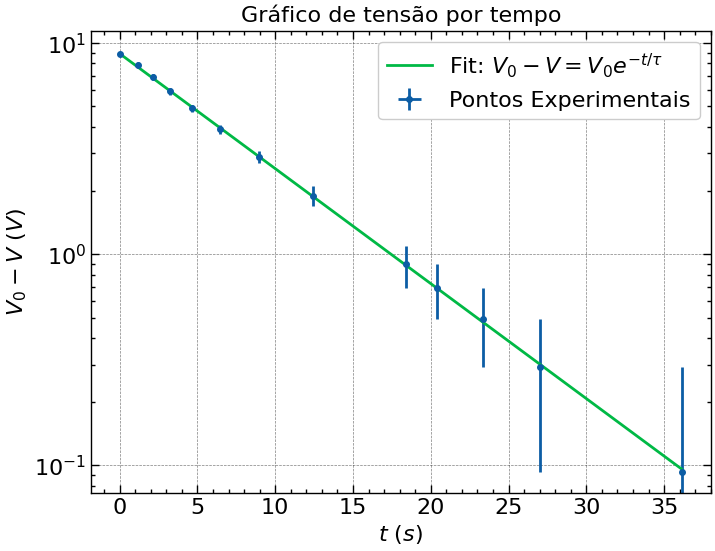

In [15]:
plt.errorbar(t,y_data, xerr= t_err, yerr= 2*V_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(t, V_0 - func(t,V_0,tau) , label= r'Fit: $V_0 - V = V_0 e^{-t/\tau}$') #$r^2$ = %.5f' % (r2)V
plt.yscale("log")

plt.xlabel("$t \ (s)$")
plt.ylabel("$V_0 - V \ (V)$")
plt.title("Gráfico de tensão por tempo")

plt.legend()

In [16]:
R = 109.6 *1e3
R_V = 0.200*1e6

eta = R_V/(R+R_V)
eta_err = np.sqrt((R_V/((R+R_V)**2)*0.1*1e3)**2 + ((1/(R + R_V) + R_V/((R+R_V)**2))*0.001*1e6)**2)

C = tau/(R*eta)
C_err = np.sqrt((1/(R*eta) * tau_err)**2 + (tau/(eta*R**2) * 0.1*1e3)**2 + (tau/(R*eta**2) *eta_err)**2)

print(f"C = {C*1e6} +- {C_err *1e6}")

C = 112.69522328174794 +- 2.1520985949987295


In [17]:
print(f"eta = {eta} +- {eta_err}")

eta = 0.6459948320413437 +- 0.005320613679102995
